# Introduction
Welcome to the second session of first module. In the last session, you learnt regular expressions and their use cases. That was a very essential skill to learn before applying your hands on any kind of text processing.

 

In this session you will learn basic lexical processing. You will get to know the various preprocessing steps you need to apply before you can do any kind of text analytics such as apply machine learning on text, building language models, building chatbots, building sentiment analysis systems and so on. These steps are used in almost all applications that work with textual data. We will also build a spam-ham detector system side-by-side on a very unclean corpus of text. Corpus is just a name to refer to textual data in NLP jargon.

 

Now, you have already built a spam detector while learning about the naive-bayes classifier. Here, you will learn all the preprocessing steps that one needs to do before using a machine learning algorithm on the spam messages dataset. Note that, the preprocessing steps that we teach you here are not limited to building a spam detector. 

Specifically, you will learn:

How to preprocess text using techniques such as

    Tokenisation

    Stop words removal

    Stemming

    Lemmatization

How to build a spam detector using one of the following models:

    Bag-of-words model

    TF-IDF model

  

## Word Frequencies and Stop Words
While working with any kind of data, the first step that you usually do is to explore and understand it better. In order to explore text data, you need to do some basic preprocessing steps. In the next few segments, you will learn some basic preprocessing and exploratory steps applicable to almost all types of textual data.

 

Now, a text is made of characters, words, sentences and paragraphs. The most basic statistical analysis you can do is to look at the word frequency distribution, i.e. visualising the word frequencies of a given text corpus.

 

It turns out that there is a common pattern you see when you plot word frequencies in a fairly large corpus of text, such as a corpus of news articles, user reviews, Wikipedia articles, etc. In the following lecture, professor Srinath will demonstrate some interesting insights from word frequency distributions. You will also learn what stopwords are and why they are lesser relevant than other words.

#### Zip's law :

Regardless of what document we are considering, there is specific pattern in which words are distributed among the document.


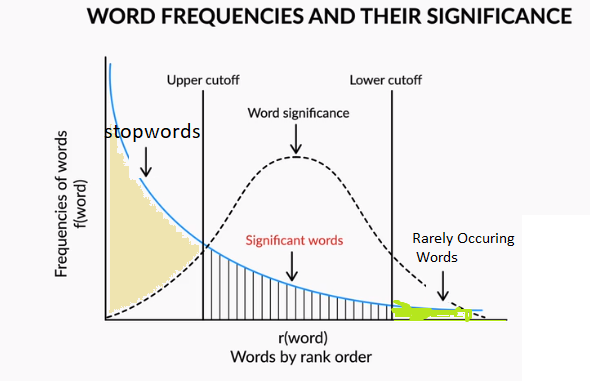


To summarise, the Zipf's law (discovered by the linguist-statistician George Zipf) states that the frequency of a word is inversely proportional to the rank of the word, where rank 1 is given to the most frequent word, 2 to the second most frequent and so on. This is also called the power law distribution.

 

The Zipf's law helps us form the basic intuition for stopwords - these are the words having the highest frequencies (or lowest ranks) in the text, and are typically of limited 'importance'.

 

Broadly, there are three kinds of words present in any text corpus:

Highly frequent words, called stop words, such as ‘is’, ‘an’, ‘the’, etc.

Significant words, which are typically more important to understand the text

Rarely occurring words, which are again less important than significant words

 

Generally speaking, stopwords are removed from the text for two reasons:

They provide no useful information, especially in applications such as spam detector or search engine. Therefore, you’re going to remove stopwords from the spam dataset.

Since the frequency of words is very high, removing stopwords results in a much smaller data as far as the size of data is concerned. Reduced size results in faster computation on text data. There’s also the advantage of less number of features to deal with if stopwords are removed.

 

However, there are exceptions when these words should not be removed. In the next module, you’ll learn concepts such as POS (parts of speech) tagging and parsing where stopwords are preserved because they provide meaningful (grammatical) information in those applications. Generally, stopwords are removed unless they prove to be very helpful in your application or analysis.

 

On the other hand, you’re not going to remove the rarely occurring words because they might provide useful information in spam detection. Also, removing them provides no added efficiency in computation since their frequency is so low.



In [1]:
import requests
from nltk import FreqDist
from nltk.corpus import stopwords
import seaborn as sns
%matplotlib inline

Download text of 'Alice in Wonderland' ebook from https://www.gutenberg.org/

In [2]:
url = "https://www.gutenberg.org/files/11/11-0.txt"
alice = requests.get(url)
print(alice.text)

﻿Project Gutenberg’s Alice’s Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice’s Adventures in Wonderland

Author: Lewis Carroll

Posting Date: June 25, 2008 [EBook #11]
Release Date: March, 1994
Last Updated: October 6, 2016

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK ALICE’S ADVENTURES IN WONDERLAND ***










ALICE’S ADVENTURES IN WONDERLAND

Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0




CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, ‘and what is the use of a book,’ tho

Define a function to plot word frequencies

In [4]:
def plot_word_frequency(words, top_n=10):
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plot = sns.barplot(labels, counts)
    return plot

Plot words frequencies present in the gutenberg corpus

Gutenberg’s


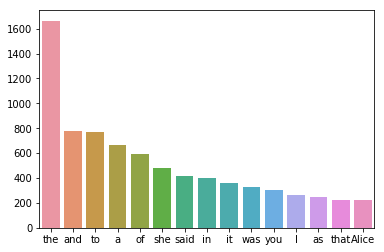

In [20]:
alice_words = alice.text.split()
print(alice_words[1])
plot_word_frequency(alice_words, 15)


## Stopwords
Import stopwords from nltk

In [6]:
from nltk.corpus import stopwords

Look at the list of stopwords

In [7]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Let's remove stopwords from the following piece of text.

In [8]:
sample_text = "the great aim of education is not knowledge but action"

Break text into words

In [9]:
sample_words = sample_text.split()
print(sample_words)

['the', 'great', 'aim', 'of', 'education', 'is', 'not', 'knowledge', 'but', 'action']


Remove stopwords

In [11]:

sample_words = [word for word in sample_words if word not in stopwords.words('english')]
print(sample_words)


['great', 'aim', 'education', 'knowledge', 'action']


Join words back to sentence


In [12]:
sample_text = " ".join(sample_words)
print(sample_text)


great aim education knowledge action


## Removing stopwords in the genesis corpus

In [13]:


no_stops = [word for word in alice_words if word not in stopwords.words("english")]

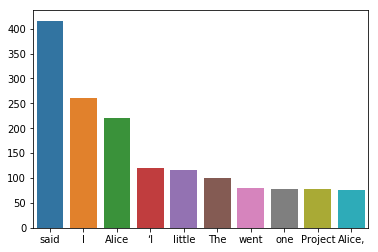

In [14]:
plot_word_frequency(no_stops, 10)



Some other things that can be done
* Need to change tokens to lower case
* Need to get rid of punctuations

All the preprocessing steps will be covered while creating the classifier

## Description
You learnt how to extract and plot word frequencies from a list of words. In this exercise, you need to extract the third most frequent word of a book (the book is provided) and print it's frequency.

In [21]:
import requests
from nltk import FreqDist

# load the ebook
url = "https://www.gutenberg.org/files/16/16-0.txt"
peter_pan = requests.get(url).text

# break the book into different words using the split() method
peter_pan_words = peter_pan.split()# write your code here

# build frequency distribution using NLTK's FreqDist() function
word_frequency = FreqDist(peter_pan_words)# write your code here

# extract the frequency of third most frequent word
freq = word_frequency.most_common(3)[2][1]

# print the third most frequent word - don't change the following code, it is used to evaluate the code
print(freq)

1214


In [22]:
word_frequency

FreqDist({'the': 2331, 'and': 1396, 'to': 1214, 'a': 962, 'of': 929, 'was': 898, 'he': 866, 'in': 683, 'that': 564, 'had': 498, ...})

## Description
In this exercise, you'll remove stop words in a given corpus of text of a book. Then, you'll print the frequency of the most frequent word.

In [27]:
import requests
from nltk import FreqDist
from nltk.corpus import stopwords

# load the ebook
url = "https://www.gutenberg.org/files/16/16-0.txt"
peter_pan = requests.get(url).text

# break the book into different words using the split() method
peter_pan_words = peter_pan.split()

# build frequency distribution using NLTK's FreqDist() function
word_frequency = FreqDist(peter_pan_words)

# extract nltk stop word list
stopwords = stopwords.words('english')

# remove 'stopwords' from 'peter_pan_words'
#no_stops = [word for word in alice_words if word not in stopwords.words("english")]
no_stops = [word for word in peter_pan_words if word not in stopwords] # write code here

# create word frequency of no_stops
word_frequency = FreqDist(no_stops)# write code here

# extract the most frequent word and its frequency
frequency = word_frequency.most_common(1)[0][1]

# print the third most frequent word - don't change the following code, it is used to evaluate the code
print(frequency)

253


## Tokenisation
You already know that you’re going to build a spam detector by the end of this module. In the spam detector application, you’re going to use word tokenisation, i.e. break the text into different words, so that each word can be used as a feature to detect whether the given message is a spam or not.

 

Now, let’s take a look at the spam messages dataset to get a better understanding of how to approach the problem of building a spam detector.


The data will contain noise as below

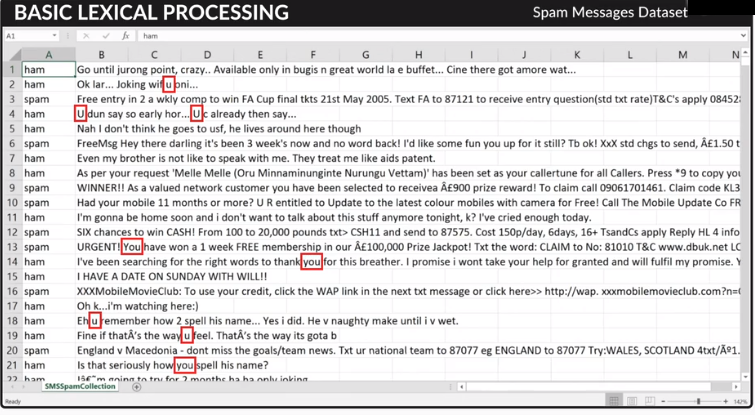

As you saw, there is a lot of noise in the data. Noise is in the form of non-uniform cases, punctuations, spelling errors. These are exactly the things that make it hard for anyone to work on text data.

 

There is another thing to think about - how to extract features from the messages so that they could be used to build a classifier. When you create any machine learning model such as a spam detector, you will need to feed in features related to each message that the machine learning algorithm can take in and build the model. But here, in the spam dataset, you only have two columns - one column contains the message and the other contains the label related to the message. And as you know, machine learning works on numeric data, not text. Earlier when you worked with text columns, you either treated them as categorical variables and converted each categorical variable to numeric variable by either assigning numeric values to each category, or you created dummy variables. Here, you can do neither of these, since the message column is unique, it’s not a categorical variable. If you treat it as a category, your model will fail miserably. You can try it as an exercise.

To deal with this problem, you will extract features from the messages. From each message you’ll extract each word by breaking each message into separate words or 'tokens'.

 

This technique is called tokenisation - a technique that’s used to split the text into smaller elements. These elements can be characters, words, sentences, or even paragraphs depending on the application you’re working on.

 

In the spam delector case, you will break each message into different words, so it’s called word tokenisation. Similarly, you have other types of tokenisation techniques such as character tokenisation, sentence tokenisation, etc. Different types of tokenisation are needed in different scenarios.

 

Now, let’s take a look at what exactly tokenisation is and how to do it in NLTK. Prof Me walks you through the process using the following Jupyter notebook.
 

## Tokenisation
The notebook contains three types of tokenisation techniques:

Word tokenisation

Sentence tokenisation

Tweet tokenisation

Custom tokenisation using regular expressions

## 1. Word tokenisation

In [28]:
document = "At nine o'clock I visited him myself. It looks like religious mania, and he'll soon think that he himself is God."
print(document)

At nine o'clock I visited him myself. It looks like religious mania, and he'll soon think that he himself is God.


Tokenising on spaces using python

In [29]:
from nltk.tokenize import word_tokenize
words = word_tokenize(document)

In [30]:
print(words)

['At', 'nine', "o'clock", 'I', 'visited', 'him', 'myself', '.', 'It', 'looks', 'like', 'religious', 'mania', ',', 'and', 'he', "'ll", 'soon', 'think', 'that', 'he', 'himself', 'is', 'God', '.']


NLTK's word tokeniser not only breaks on whitespaces but also breaks contraction words such as he'll into "he" and "'ll". On the other hand it doesn't break "o'clock" and treats it as a separate token.

## 2. Sentence tokeniser
Tokenising based on sentence requires you to split on the period ('.'). Let's use nltk sentence tokeniser.

In [31]:
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(document)

In [32]:
print(sentences)

["At nine o'clock I visited him myself.", "It looks like religious mania, and he'll soon think that he himself is God."]


## 3. Tweet tokeniser
A problem with word tokeniser is that it fails to tokeniser emojis and other complex special characters such as word with hashtags. Emojis are common these days and people use them all the time.

In [33]:
message = "i recently watched this show called mindhunters:). i totally loved it 😍. it was gr8 <3. #bingewatching #nothingtodo 😎"

In [34]:
print(word_tokenize(message))

['i', 'recently', 'watched', 'this', 'show', 'called', 'mindhunters', ':', ')', '.', 'i', 'totally', 'loved', 'it', '😍', '.', 'it', 'was', 'gr8', '<', '3', '.', '#', 'bingewatching', '#', 'nothingtodo', '😎']


The word tokeniser breaks the emoji '<3' into '<' and '3' which is something that we don't want. Emojis have their own significance in areas like sentiment analysis where a happy face and sad face can salone prove to be a really good predictor of the sentiment. Similarly, the hashtags are broken into two tokens. A hashtag is used for searching specific topics or photos in social media apps such as Instagram and facebook. So there, you want to use the hashtag as is.

Let's use the tweet tokeniser of nltk to tokenise this message.

In [36]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

In [37]:
tknzr.tokenize(message)

['i',
 'recently',
 'watched',
 'this',
 'show',
 'called',
 'mindhunters',
 ':)',
 '.',
 'i',
 'totally',
 'loved',
 'it',
 '😍',
 '.',
 'it',
 'was',
 'gr8',
 '<3',
 '.',
 '#bingewatching',
 '#nothingtodo',
 '😎']

As you can see, it handles all the emojis and the hashtags pretty well.

Now, there is a tokeniser that takes a regular expression and tokenises and returns result based on the pattern of regular expression.

Let's look at how you can use regular expression tokeniser.

In [38]:
from nltk.tokenize import regexp_tokenize
message = "i recently watched this show called mindhunters:). i totally loved it 😍. it was gr8 <3. #bingewatching #nothingtodo 😎"
pattern = "#[\w]+"

In [39]:
regexp_tokenize(message, pattern)

['#bingewatching', '#nothingtodo']

There are multiple ways of doing a particular thing in Python. To tokenise words, you can use the split() method that just splits text on white spaces, by default. This method doesn’t always give good results. You are better off using NLTK’s tokeniser which handles various complexities of text. One of them is that it handles contractions such as “can’t”, “hasn’t”, “wouldn’t”, and other contraction words and splits these up although there is no space between them. On the other hand, it is smart enough to not split words such as “o’clock” which is not a contraction word.

 

In NLTK, you also have different types of tokenisers present that you can use in different applications. The most popular tokenisers are:

    1.Word tokeniser splits text into different words.

    2.Sentence tokeniser splits text in different sentence.

    3.Tweet tokeniser handles emojis and hashtags that you see in social media texts

    4.Regex tokeniser lets you build your own custom tokeniser using regex patterns of your choice.

## Description
Write a piece of code that breaks a given sentence into words and store them in a list. Then print the list as well as the length of the list. Use the NLTK tokeniser to tokenise words.

Sample input:
"I love pasta"

In [41]:
from nltk.tokenize import word_tokenize
import ast, sys
sentence = "I love pasta"

# tokenise sentence into words
words = word_tokenize(sentence)# write your code here

# print length - don't change the following piece of code
print(len(words))

3


## Description
Write a piece of code that breaks a given sentence into words and stores them in a list. Then remove the stop words from this list and then print the list as well as the length of the list. Again, use the NLTK tokeniser to do this.

Sample input: 
“Education is the most powerful weapon that you can use to change the world” 

In [42]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import ast, sys
sentence = "Education is the most powerful weapon that you can use to change the world"

# change sentence to lowercase
sentence = sentence.lower() # write code here

# tokenise sentence into words
words =  word_tokenize(sentence)# write code here

# extract nltk stop word list
stopwords = stopwords.words('english')# write code here

# remove stop words
no_stops = [word for word in words if word not in stopwords]# write code here

# print length - don't change the following piece of code
print(len(no_stops))

6


## Description
Write a Python code using the NLTK library that breaks a given piece of text containing multiple sentences into different sentences. Finally print the total number of sentences in the text. 

Sample input: 
Develop a passion for your learning. If you do, you’ll never cease to grow.

In [44]:
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import ast, sys
text = "Develop a passion for your learning. If you do, you’ll never cease to grow."

# change sentence to lowercase
text = text.lower()#write code here

# tokenise sentence into words
sentences = sent_tokenize(text)# write code here

# print length - don't change the following piece of code
print(len(sentences))

2


### Description
Use NLTK’s regex tokeniser to extract all the mentions from a given tweet and then print the total number of mentions. A mention comprises of a ‘@’ symbol followed by a username containing either alphabets, numbers or underscores. 

Sample tweet:

So excited to be a part of machine learning and artificial intelligence program made by @baba and @iit

Expected output:

2 (because there are two mentions - ‘@baba’ and ‘@iit’ )

In [47]:
from nltk.tokenize import regexp_tokenize
from nltk.corpus import stopwords
import ast, sys
text = "So excited to be a part of machine learning and artificial intelligence program made by @baba and @iit"

# change text to lowercase
text = text.lower()# write code here

# pattern to extract mentions
pattern = '@[\w]+'# write regex pattern here

# extract mentions by using regex tokeniser
mentions = regexp_tokenize(text,pattern)# write code here

# print length - don't change the following piece of code
print(len(mentions))

2


## Bag-of-Words Representation
You have now learnt two preprocessing steps - tokenisation and removing stopwords. But you still can’t use the list of words that you get after these processing steps to train a machine learning model.

 

In this section, you’ll learn how to represent text in a format that you can feed into machine learning algorithms. The most common and most popular approach is to create a bag-of-words representation of the text data that you have. The central idea is that any given piece of text, i.e., tweets, articles, messages, emails etc., can be “represented” by a list of all the words that occur in it (after removing the stopwords), where the sequence of occurrence does not matter. You can visualise it as the “bag” of all “words” that occur in it. For example, consider the messages:

                        “Gangs of Wasseypur is a great movie”
                        
The bag of words representation for this message would be:

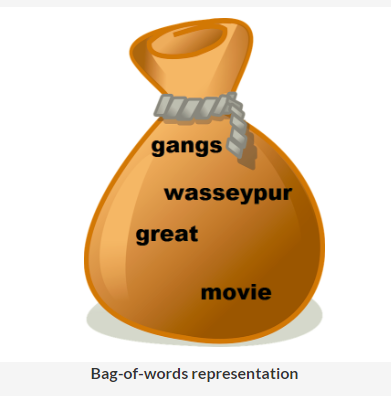

This way, you can create “bags” for representing each of the messages in your training and test data set. But how do you go from these bags to building a spam classifier?

 

Let’s say the bags, for most of the spam messages, contain words such as prize, lottery etc., and most of the ham bags don’t. Now, whenever you run into a new message, just look at its “bag-of-words” representation. Does the bag for this message resemble that of messages you already know as spam, or does it not resemble them? Based on the answer to the previous question, you can then classify the message.

 

Now, the next question is, how do you get a machine to do all of that? Well, turns out that for doing that, you need to represent all the bags in a matrix format, after which you can use ML algorithms such as naive Bayes, logistic regression, SVM etc., to do the final classification.

 

But how is this matrix representation created? Let’s understand it from professor ME.

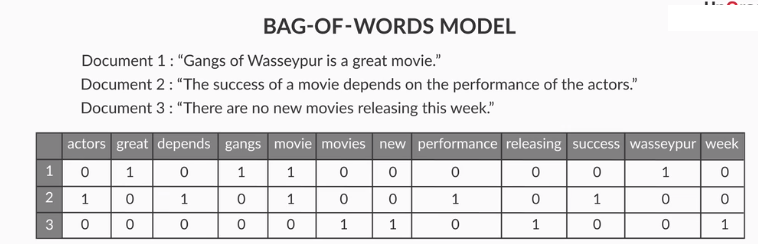

So, that’s how text is represented in the form of matrix. It can then be used to train machine learning models. Each document sits on a separate row and each word of the vocabulary has a its own column. These vocabulary words are also called as features of the text.

 

The bag-of-words representation is also called bag-of-words model but this is not to be confused with a machine learning model. A bag-of-words model is just the matrix that you get from text data.

 

Another thing to note is that the values inside any cell can be filled in two ways - 1) you can either fill the cell with the frequency of a word (i.e. a cell can have a value of 0 or more), or 2) fill the cell with either 0, in case the word is not present or 1, in case the word is present (binary format).

 

Both approaches work fine and don’t usually result in a big difference. The frequency approach is slightly more popular and the NLTK library in Python also fills the bag-of-words model with word frequencies rather than binary 0 or 1 values.

 

Now, it’s your turn to create a bag of words model. Consider these documents and create a bag-of-words model with the frequency approach on these documents. Please note that there is no need to remove the stop words in this case (just for this exercise). After you’re done creating the model, answer the questions that follow.


Document 1: “there was a place on my ankle that was itching”

Document 2: “but I did not scratch it”

Document 3: “and then my ear began to itch”

Document 4: “and next my back”

Now, let’s see how bag-of-words model is built in Python. Download the Jupyter notebook of the code here, to follow along:

## Bag of words model

In [1]:
# load all necessary libraries
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option('max_colwidth', 100)

Let's build a basic bag of words model on three sample documents

In [10]:
documents = ["Gangs of Wasseypur is a great movie.", "The success of a movie depends on the performance of the actors.", "There are no new movies releasing this week."]
print(documents)

['Gangs of Wasseypur is a great movie.', 'The success of a movie depends on the performance of the actors.', 'There are no new movies releasing this week.']


In [11]:
def preprocess(document):
    'changes document to lower case and removes stopwords'

    # change sentence to lower case
    document = document.lower()

    # tokenize into words
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stopwords.words("english")]

    # join words to make sentence
    document = " ".join(words)
    
    return document

documents = [preprocess(document) for document in documents]
print(documents)


['gangs wasseypur great movie .', 'success movie depends performance actors .', 'new movies releasing week .']


Creating bag of words model using count vectorizer function

In [12]:
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(documents)
print(bow_model)  # returns the rown and column number of cells which have 1 as value

  (0, 4)	1
  (0, 3)	1
  (0, 10)	1
  (0, 2)	1
  (1, 0)	1
  (1, 7)	1
  (1, 1)	1
  (1, 9)	1
  (1, 4)	1
  (2, 11)	1
  (2, 8)	1
  (2, 5)	1
  (2, 6)	1


In [13]:
# print the full sparse matrix
print(bow_model.toarray())

[[0 0 1 1 1 0 0 0 0 0 1 0]
 [1 1 0 0 1 0 0 1 0 1 0 0]
 [0 0 0 0 0 1 1 0 1 0 0 1]]


In [51]:
print(bow_model.shape)
print(vectorizer.get_feature_names())
import numpy as np

print(bow_model.sum())

(100, 640)
['000', '07732584351', '0800', '08000930705', '08002986030', '08452810075over18', '09061209465', '09061701461', '09066364589', '10', '100', '1000', '10am', '11', '12', '1500', '150p', '150pm', '16', '169', '18', '20', '2005', '21st', '2nd', '3aj', '4403ldnw1a7rw18', '450ppw', '4txt', '50', '5000', '5249', '530', '5we', '6031', '6days', '81010', '85069', '87077', '87121', '87575', '8am', '900', '92h', '9pm', 'abiola', 'abt', 'ac', 'accomodations', 'aco', 'actin', 'advise', 'aft', 'afternoon', 'ah', 'ahead', 'ahhh', 'aids', 'almost', 'already', 'alright', 'always', 'amore', 'amp', 'animation', 'another', 'anymore', 'anything', 'apologetic', 'apply', 'appointment', 'arabian', 'ard', 'around', 'ask', 'available', 'awarded', 'babe', 'back', 'badly', 'barbie', 'becoz', 'bed', 'beforehand', 'best', 'bit', 'blessing', 'bonus', 'box', 'breather', 'britney', 'brother', 'buffet', 'bugis', 'burger', 'burns', 'bus', 'buy', 'bx420', 'ca', 'call', 'callers', 'callertune', 'calls', 'camcord

## Let's create a bag of words model on the spam dataset.

In [41]:
# load data
spam = pd.read_csv("SMSSpamCollection_bow.txt", sep = "\t", names=["label", "message"])
spam.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


##### Let's take a subset of data (first 50 rows only) and create bag of word model on that.

In [42]:
spam = spam.iloc[0:100,:]
print(spam)

   label  \
0    ham   
1    ham   
2   spam   
3    ham   
4    ham   
5   spam   
6    ham   
7    ham   
8   spam   
9   spam   
10   ham   
11  spam   
12  spam   
13   ham   
14   ham   
15  spam   
16   ham   
17   ham   
18   ham   
19  spam   
20   ham   
21   ham   
22   ham   
23   ham   
24   ham   
25   ham   
26   ham   
27   ham   
28   ham   
29   ham   
..   ...   
70   ham   
71   ham   
72   ham   
73   ham   
74   ham   
75   ham   
76   ham   
77   ham   
78   ham   
79   ham   
80   ham   
81   ham   
82   ham   
83   ham   
84   ham   
85   ham   
86   ham   
87   ham   
88   ham   
89   ham   
90   ham   
91   ham   
92   ham   
93  spam   
94   ham   
95  spam   
96   ham   
97   ham   
98   ham   
99   ham   

                                                                                                message  
0   Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...  
1                                          

In [43]:
# extract the messages from the dataframe
messages = spam.message
print(messages)

0     Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...
1                                                                           Ok lar... Joking wif u oni...
2     Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3                                                       U dun say so early hor... U c already then say...
4                                           Nah I don't think he goes to usf, he lives around here though
5     FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for ...
6                           Even my brother is not like to speak with me. They treat me like aids patent.
7     As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...
8     WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...
9     Had your mobile 11 months or more? U R e

In [44]:
# convert messages into list
messages = [message for message in messages]
print(messages)

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think he goes to usf, he lives around here though", "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv", 'Even my brother is not like to speak with me. They treat me like aids patent.', "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune", 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.', 'Had your mobile 

In [45]:
# preprocess messages using the preprocess function
messages = [preprocess(message) for message in messages]
print(messages)

['go jurong point , crazy.. available bugis n great world la e buffet ... cine got amore wat ...', 'ok lar ... joking wif u oni ...', "free entry 2 wkly comp win fa cup final tkts 21st may 2005. text fa 87121 receive entry question ( std txt rate ) & c 's apply 08452810075over18 's", 'u dun say early hor ... u c already say ...', "nah n't think goes usf , lives around though", "freemsg hey darling 's 3 week 's word back ! 'd like fun still ? tb ok ! xxx std chgs send , £1.50 rcv", 'even brother like speak . treat like aids patent .', "per request 'melle melle ( oru minnaminunginte nurungu vettam ) ' set callertune callers . press *9 copy friends callertune", 'winner ! ! valued network customer selected receivea £900 prize reward ! claim call 09061701461. claim code kl341 . valid 12 hours .', 'mobile 11 months ? u r entitled update latest colour mobiles camera free ! call mobile update co free 08002986030', "'m gon na home soon n't want talk stuff anymore tonight , k ? 've cried enough 

In [46]:
# bag of words model
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(messages)
print(bow_model.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [47]:
print(bow_model.shape)
print(vectorizer.get_feature_names())

(100, 640)
['000', '07732584351', '0800', '08000930705', '08002986030', '08452810075over18', '09061209465', '09061701461', '09066364589', '10', '100', '1000', '10am', '11', '12', '1500', '150p', '150pm', '16', '169', '18', '20', '2005', '21st', '2nd', '3aj', '4403ldnw1a7rw18', '450ppw', '4txt', '50', '5000', '5249', '530', '5we', '6031', '6days', '81010', '85069', '87077', '87121', '87575', '8am', '900', '92h', '9pm', 'abiola', 'abt', 'ac', 'accomodations', 'aco', 'actin', 'advise', 'aft', 'afternoon', 'ah', 'ahead', 'ahhh', 'aids', 'almost', 'already', 'alright', 'always', 'amore', 'amp', 'animation', 'another', 'anymore', 'anything', 'apologetic', 'apply', 'appointment', 'arabian', 'ard', 'around', 'ask', 'available', 'awarded', 'babe', 'back', 'badly', 'barbie', 'becoz', 'bed', 'beforehand', 'best', 'bit', 'blessing', 'bonus', 'box', 'breather', 'britney', 'brother', 'buffet', 'bugis', 'burger', 'burns', 'bus', 'buy', 'bx420', 'ca', 'call', 'callers', 'callertune', 'calls', 'camcord

In [48]:
# look at the dataframe
pd.DataFrame(bow_model.toarray(), columns = vectorizer.get_feature_names())

,000,07732584351,0800,08000930705,08002986030,08452810075over18,09061209465,09061701461,09066364589,10,...,xxx,xxxmobilemovieclub,yeah,year,yes,yesterday,yo,yummy,yup,ú1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


To build a bag-of-words model in Python, you can use the scikit-learn library. As you saw, you get lots of redundant features after building the model. There were features such as ‘get’ and ‘getting’, ‘goes’ and ‘going’, ‘see’ and ‘seeing’ and along with a lot of other duplicate features. They are not exactly duplicates but they’re redundant in the sense that they’re not giving you any extra information about the message. In fact, the words ‘winner’ and ‘win’ are equivalent when your goal is to detect whether a message is spam or not.

 

Hence, keeping the two separate is actually going to hinder the performance of the machine learning algorithm since it is redundant information. Also, this redundancy is going to increase the number of features due to which the classifier can face the curse of dimensionality. To get rid of this problem, you’re going to learn two more preprocessing techniques - stemming and lemmatization - in the next section.

In the next section, you’ll learn about preprocessing techniques that’ll help you to get rid of redundant tokens or features.

## Stemming and Lemmatization
 

In the last section, you had seen the problem of redundant tokens. This will result in an inefficient model when you build your spam detector. Stemming makes sure that different variations of a word, say ‘warm’, warmer’, ‘warming’ and ‘warmed,’ are represented by a single token - ‘warm’, because they all represent the same information (represented by the 'stem' of the word).

 

Another similar preprocessing step (and an alternative to stemming) is lemmatisation.

 

You’ll now learn about these two techniques that will help you deal with the problem of redundant tokens:

    1.Stemming    


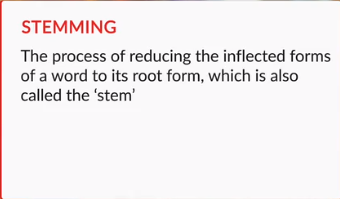
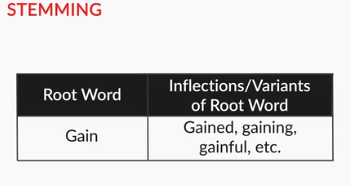
    
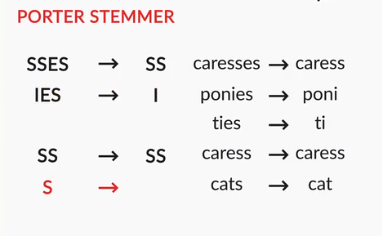

    2.Lemmatization
    
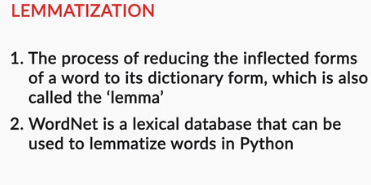

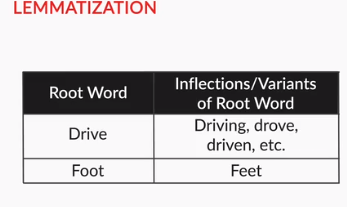


If you noticed, the repeated tokens or features were nothing but a variation or an inflected form of the other token. For example, the word ‘seeing’ is an inflection of the word ‘see’. Similarly, the word ‘limited’ is an inflection of the word ‘limit’. The two techniques that you just learnt reduce these inflected words to the original base form. But which is one is a better technique in what situations? Let’s look at them one by one:

### Stemming

It is a rule-based technique that just chops off the suffix of a word to get its root form, which is called the ‘stem’. For example, if you use a stemmer to stem the words of the string - "The driver is racing in his boss’ car", the words ‘driver’ and ‘racing’ will be converted to their root form by just chopping of the suffixes ‘er’ and ‘ing’. So, ‘driver’ will be converted to ‘driv’ and ‘racing’ will be converted to ‘rac’.

 

You might think that the root forms (or stems) don’t resemble the root words - ‘drive’ and ‘race’. You don’t have to worry about this because the stemmer will convert all the variants of ‘drive’ and ‘racing’ to those root forms only. So, it will convert ‘drive’, ‘driving’, etc. to ‘driv’, and ‘race’, ‘racer’, etc. to ‘rac’. This gives us satisfactory results in most cases.

 

There are two popular stemmers:

    1.Porter stemmer: This was developed in 1980 and works only on English words. You can find all the detailed rules of this stemmer here
http://snowball.tartarus.org/algorithms/porter/stemmer.html
    
    2.Snowball stemmer: This is a more versatile stemmer that not only works on English words but also on words of other languages such as French, German, Italian, Finnish, Russian, and many more languages. You can learn more about this stemmer here 
http://snowball.tartarus.org/ .

## Lemmatization

This is a more sophisticated technique (and perhaps more 'intelligent') in the sense that it doesn’t just chop off the suffix of a word. Instead, it takes an input word and searches for its base word by going recursively through all the variations of dictionary words. The base word in this case is called the lemma. Words such as ‘feet’, ‘drove’, ‘arose’, ‘bought’, etc. can’t be reduced to their correct base form using a stemmer. But a lemmatizer can reduce them to their correct base form. The most popular lemmatizer is the WordNet lemmatizer created by a team od researchers at the Princeton university. You can read more about it here.
https://wordnet.princeton.edu/

Nevertheless, you may sometimes find yourself confused in whether to use a stemmer or a lemmatizer in your application. The following points might help you make the decision:

    1.A stemmer is a rule based technique, and hence, it is much faster than the lemmatizer (which searches the dictionary to look for the lemma of a word). On the other hand, a stemmer typically gives less accurate results than a lemmatizer.

    2.A lemmatizer is slower because of the dictionary lookup but gives better results than a stemmer. Now, as a side note, it is important to know that for a lemmatizer to perform accurately, you need to provide the part-of-speech tag of the input word (noun, verb, adjective etc.). You’ll see learn POS tagging in the next session - but it would suffice to know that there are often cases when the POS tagger itself is quite inaccurate on your text, and that will worsen the performance of the lemmatiser as well. In short, you may want to consider a stemmer rather than a lemmatiser if you notice that POS tagging is inaccurate.
    
In general, you can try both and see if its worth using a lemmatizer over a stemmer. If a stemmer is giving you almost same results with increased efficiency than choose a stemmer, otherwise use a lemmatizer.

### Description
Write a function which takes an input word and stems it by chopping off its suffix. For the sake of simplicity, consider only words that have the following suffixes: 

'ing' 

'ed

Sample input: ‘playing’ 

Expected output: ‘play’ 

Tip: Use regular expressions!

In [61]:
import re
import ast, sys
word = "played"

# create function to chop off the suffixes 'ing' and 'ed'
def stemmer(word):
    # write your code here   
    word = re.sub('(ing|ed)$','',word)
    return word

# stem word -- don't change the following code, it is used to evaluate your code
print(stemmer(word))

play


### Stemming

In [62]:
# import libraries
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [63]:
text = "Very orderly and methodical he looked, with a hand on each knee, and a loud watch ticking a sonorous sermon under his flapped newly bought waist-coat, as though it pitted its gravity and longevity against the levity and evanescence of the brisk fire."
print(text)

Very orderly and methodical he looked, with a hand on each knee, and a loud watch ticking a sonorous sermon under his flapped newly bought waist-coat, as though it pitted its gravity and longevity against the levity and evanescence of the brisk fire.


In [64]:
tokens = word_tokenize(text.lower())
print(tokens)

['very', 'orderly', 'and', 'methodical', 'he', 'looked', ',', 'with', 'a', 'hand', 'on', 'each', 'knee', ',', 'and', 'a', 'loud', 'watch', 'ticking', 'a', 'sonorous', 'sermon', 'under', 'his', 'flapped', 'newly', 'bought', 'waist-coat', ',', 'as', 'though', 'it', 'pitted', 'its', 'gravity', 'and', 'longevity', 'against', 'the', 'levity', 'and', 'evanescence', 'of', 'the', 'brisk', 'fire', '.']


In [65]:
stemmer = PorterStemmer()
porter_stemmed = [stemmer.stem(token) for token in tokens]
print(porter_stemmed)
len(porter_stemmed)

['veri', 'orderli', 'and', 'method', 'he', 'look', ',', 'with', 'a', 'hand', 'on', 'each', 'knee', ',', 'and', 'a', 'loud', 'watch', 'tick', 'a', 'sonor', 'sermon', 'under', 'hi', 'flap', 'newli', 'bought', 'waist-coat', ',', 'as', 'though', 'it', 'pit', 'it', 'graviti', 'and', 'longev', 'against', 'the', 'leviti', 'and', 'evanesc', 'of', 'the', 'brisk', 'fire', '.']


47

In [70]:
# snowball stemmer
stemmer = SnowballStemmer("english")
snowball_stemmed = [stemmer.stem(token) for token in tokens]
print(snowball_stemmed)
len(snowball_stemmed)

['veri', 'order', 'and', 'method', 'he', 'look', ',', 'with', 'a', 'hand', 'on', 'each', 'knee', ',', 'and', 'a', 'loud', 'watch', 'tick', 'a', 'sonor', 'sermon', 'under', 'his', 'flap', 'newli', 'bought', 'waist-coat', ',', 'as', 'though', 'it', 'pit', 'it', 'graviti', 'and', 'longev', 'against', 'the', 'leviti', 'and', 'evanesc', 'of', 'the', 'brisk', 'fire', '.']


47

In [72]:
df = pd.DataFrame({'token': tokens, 'porter_stemmed': porter_stemmed, 'snowball_stemmed': snowball_stemmed})
df = df[['token', 'porter_stemmed', 'snowball_stemmed']]

In [73]:
df[(df.token != df.porter_stemmed) | (df.token != df.snowball_stemmed)]

,token,porter_stemmed,snowball_stemmed
0,very,veri,veri
1,orderly,orderli,order
3,methodical,method,method
5,looked,look,look
18,ticking,tick,tick
20,sonorous,sonor,sonor
23,his,hi,his
24,flapped,flap,flap
25,newly,newli,newli
32,pitted,pit,pit


You learnt to use two types of stemmers - the Porter stemmer and the Snowball stemmer. Snowball stemmer works a little better, but usually, you won’t see much of a difference as both of them are rule based. Snowball has some updated rules and that’s why you saw it stems some words differently. Practice your stemming skills in the following exercise.

### Description
Use Porter stemmer to stem a given word

Sample input: Gardening

Expected output: Garden

In [76]:
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
import ast, sys
word = 'coming'

# instantiate porter stemmer
stemmer = PorterStemmer()# write code here

# stem word
stemmed = stemmer.stem(word)# write your code here

# print stemmed word -- don't change the following code, it is used to evaluate your code
print(stemmed)

come


### Description
Stem a given word using Snowball stemmer.

Sample input:
coming

Expected output:
come

In [75]:
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import ast, sys
word = "coming"

# instantiate porter stemmer
stemmer = SnowballStemmer("english")# write code here

# stem word
stemmed = stemmer.stem(word)# write code here

# print stemmed word -- don't change the following code, it is used to evaluate your code
print(stemmed)

come


## Lemmatization

In [77]:
### import necessary libraries
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [78]:
text = "Very orderly and methodical he looked, with a hand on each knee, and a loud watch ticking a sonorous sermon under his flapped newly bought waist-coat, as though it pitted its gravity and longevity against the levity and evanescence of the brisk fire."
print(text)


Very orderly and methodical he looked, with a hand on each knee, and a loud watch ticking a sonorous sermon under his flapped newly bought waist-coat, as though it pitted its gravity and longevity against the levity and evanescence of the brisk fire.


In [79]:
# tokenise text
tokens = word_tokenize(text)

In [80]:
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(token) for token in tokens]
print(lemmatized)

['Very', 'orderly', 'and', 'methodical', 'he', 'looked', ',', 'with', 'a', 'hand', 'on', 'each', 'knee', ',', 'and', 'a', 'loud', 'watch', 'ticking', 'a', 'sonorous', 'sermon', 'under', 'his', 'flapped', 'newly', 'bought', 'waist-coat', ',', 'a', 'though', 'it', 'pitted', 'it', 'gravity', 'and', 'longevity', 'against', 'the', 'levity', 'and', 'evanescence', 'of', 'the', 'brisk', 'fire', '.']


## Let's compare stemming and lemmatization

In [81]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
stemmed = [stemmer.stem(token) for token in tokens]
print(stemmed)

['veri', 'orderli', 'and', 'method', 'he', 'look', ',', 'with', 'a', 'hand', 'on', 'each', 'knee', ',', 'and', 'a', 'loud', 'watch', 'tick', 'a', 'sonor', 'sermon', 'under', 'hi', 'flap', 'newli', 'bought', 'waist-coat', ',', 'as', 'though', 'it', 'pit', 'it', 'graviti', 'and', 'longev', 'against', 'the', 'leviti', 'and', 'evanesc', 'of', 'the', 'brisk', 'fire', '.']


In [82]:
import pandas as pd
df = pd.DataFrame(data={'token': tokens, 'stemmed': stemmed, 'lemmatized': lemmatized})
df = df[['token', 'stemmed', 'lemmatized']]
df[(df.token != df.stemmed) | (df.token != df.lemmatized)]

,token,stemmed,lemmatized
0,Very,veri,Very
1,orderly,orderli,orderly
3,methodical,method,methodical
5,looked,look,looked
18,ticking,tick,ticking
20,sonorous,sonor,sonorous
23,his,hi,his
24,flapped,flap,flapped
25,newly,newli,newly
29,as,as,a


### Let's compare the speed of both techniques

In [83]:
import requests
url = "https://www.gutenberg.org/files/11/11-0.txt"
alice = requests.get(url)
print(alice.text)

﻿Project Gutenberg’s Alice’s Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice’s Adventures in Wonderland

Author: Lewis Carroll

Posting Date: June 25, 2008 [EBook #11]
Release Date: March, 1994
Last Updated: October 6, 2016

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK ALICE’S ADVENTURES IN WONDERLAND ***










ALICE’S ADVENTURES IN WONDERLAND

Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0




CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, ‘and what is the use of a book,’ tho

In [84]:
wordnet_lemmatizer = WordNetLemmatizer()
wordnet_lemmatizer.lemmatize("having")


'having'

In [85]:
%%time
_ = [wordnet_lemmatizer.lemmatize(token, pos='n') for token in word_tokenize(alice.text)]

Wall time: 387 ms


In [86]:
%%time
_ = [stemmer.stem(token) for token in word_tokenize(alice.text)]

Wall time: 749 ms


* Lemmatising is faster than stemming in this case because the nltk lemmatiser also takes another argument called the part-of-speech (POS) tag of the input word.
* The default part-of-speech tag is 'noun'..
* You will learn more about part-of-speech tagging later in this course.
* Right now, the stemmer will have more accuracy than the lemmatiser because each word is lemmatised assuming it's a noun. To lemmatise efficiently, you need to pass it's POS tag manually.

CLARIFICATION: You observed that in this case, lemmatization was faster than stemming. That’s due to the fact that we didn’t pass the part-of-speech tag with each word. Because of this, lemmatization happened quickly, but incorrectly. Had we passed the POS tag for each word, lemmatization would have had much more accuracy than stemming, but it would have also taken a lot of time.

 

You’ll see how to find the POS tag of a word in the second module. Then, you’ll be able to pass each word’s POS tag along with it to lemmatize it correctly. Practice your lemmatization skills in the following quiz.

### Description
Lemmatize a given word (consider verbs only) using the WordNet Lemmatizer.

Sample input:
schooling

Expected output:
school

In [88]:
from nltk.stem import WordNetLemmatizer
import ast, sys
word = 'schooling'

# instantiate wordnet lemmatizer
lemmatizer = WordNetLemmatizer()# write code here

# lemmatize word
lemmatized = lemmatizer.lemmatize(word,pos='v')# write code here. Pass the parameter -> pos='v' to the lemmatize function to lemmatize verbs correctly.

# print lemmatized word -- don't change the following code, it is used to evaluate your code
print(lemmatized)

school


## Final Bag-of-Words Representation
 

You’ve learn quite a few techniques in lexical preprocessing, namely:

    1.Plotting word frequencies and removing stopwords

    2.Tokenisation

    3.Stemming

    4.Lemmatization

 

Now, let’s create the bag-of-words model, again, but this time, using stemming and lemmatization along with the other preprocessing steps. It will result in reducing the number of features by eliminating redundant features that we had created earlier. But more importantly, will lead to a more efficient representation. You can download the Jupyter notebook that the professor uses here:

You saw how stemming and lemmatization performed on the spam dataset. Lemmatization didn’t perform as good as it should have because of two reasons:

* Lemmatization expected the POS tag of the word to be passed along with the word. We didn’t pass the POS tag here. You’ll learn how to assign POS tags in the next module.

* Lemmatization only works on correctly spelt words. Since there are a lot of misspelt words in the dataset, lemmatization makes no changes to them.

 

In other words, the comparison of stemming and lemmatization wasn’t actually fair. You can redo this comparison when you learn to tag each word with it’s POS tag. Then, you can automate the process of lemmatization by passing the word along with it’s POS tag. It will be fair to compare the process of stemming and lemmatization only then. The comparison here was just for demonstration purposes.

 

In the next section, you’ll learn a new way to create matrix representation from a text corpus of documents.

### Bag of words model

In [89]:
# load all necessary libraries
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option('max_colwidth', 100)

#### Let's build a basic bag of words model on three sample documents

In [91]:
documents = ["Gangs of Wasseypur is a great movie.", "The success of a movie depends on the performance of the actors.", "There are no new movies releasing this week."]
print(documents)

['Gangs of Wasseypur is a great movie.', 'The success of a movie depends on the performance of the actors.', 'There are no new movies releasing this week.']


In [92]:
def preprocess(document):
    'changes document to lower case and removes stopwords'

    # change sentence to lower case
    document = document.lower()

    # tokenize into words
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stopwords.words("english")]

    # join words to make sentence
    document = " ".join(words)
    
    return document

documents = [preprocess(document) for document in documents]
print(documents)


['gangs wasseypur great movie .', 'success movie depends performance actors .', 'new movies releasing week .']


#### Creating bag of words model using count vectorizer function


In [93]:
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(documents)
print(bow_model)  # returns the row number and column number of the cells which have 1 as value

  (0, 4)	1
  (0, 3)	1
  (0, 10)	1
  (0, 2)	1
  (1, 0)	1
  (1, 7)	1
  (1, 1)	1
  (1, 9)	1
  (1, 4)	1
  (2, 11)	1
  (2, 8)	1
  (2, 5)	1
  (2, 6)	1


In [94]:
# print the full sparse matrix
print(bow_model.toarray())

[[0 0 1 1 1 0 0 0 0 0 1 0]
 [1 1 0 0 1 0 0 1 0 1 0 0]
 [0 0 0 0 0 1 1 0 1 0 0 1]]


In [95]:
print(bow_model.shape)
print(vectorizer.get_feature_names())

(3, 12)
['actors', 'depends', 'gangs', 'great', 'movie', 'movies', 'new', 'performance', 'releasing', 'success', 'wasseypur', 'week']


#### Let's create a bag of words model on the spam dataset.

In [96]:
# load data
spam = pd.read_csv("SMSSpamCollection_fin.txt", sep = "\t", names=["label", "message"])
spam.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


### Let's take a subset of data (first 50 rows only) and create bag of word model on that.

In [97]:
spam = spam.iloc[0:50,:]
print(spam)

   label  \
0    ham   
1    ham   
2   spam   
3    ham   
4    ham   
5   spam   
6    ham   
7    ham   
8   spam   
9   spam   
10   ham   
11  spam   
12  spam   
13   ham   
14   ham   
15  spam   
16   ham   
17   ham   
18   ham   
19  spam   
20   ham   
21   ham   
22   ham   
23   ham   
24   ham   
25   ham   
26   ham   
27   ham   
28   ham   
29   ham   
30   ham   
31   ham   
32   ham   
33   ham   
34  spam   
35   ham   
36   ham   
37   ham   
38   ham   
39   ham   
40   ham   
41   ham   
42  spam   
43   ham   
44   ham   
45   ham   
46   ham   
47   ham   
48   ham   
49   ham   

                                                                                                message  
0   Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...  
1                                                                         Ok lar... Joking wif u oni...  
2   Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 200

In [98]:
# extract the messages from the dataframe
messages = spam.message
print(messages)

0     Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...
1                                                                           Ok lar... Joking wif u oni...
2     Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3                                                       U dun say so early hor... U c already then say...
4                                           Nah I don't think he goes to usf, he lives around here though
5     FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for ...
6                           Even my brother is not like to speak with me. They treat me like aids patent.
7     As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...
8     WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...
9     Had your mobile 11 months or more? U R e

In [99]:
# convert messages into list
messages = [message for message in messages]
print(messages)

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think he goes to usf, he lives around here though", "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv", 'Even my brother is not like to speak with me. They treat me like aids patent.', "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune", 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.', 'Had your mobile 

In [100]:
# preprocess messages using the preprocess function
messages = [preprocess(message) for message in messages]
print(messages)

['go jurong point , crazy.. available bugis n great world la e buffet ... cine got amore wat ...', 'ok lar ... joking wif u oni ...', "free entry 2 wkly comp win fa cup final tkts 21st may 2005. text fa 87121 receive entry question ( std txt rate ) & c 's apply 08452810075over18 's", 'u dun say early hor ... u c already say ...', "nah n't think goes usf , lives around though", "freemsg hey darling 's 3 week 's word back ! 'd like fun still ? tb ok ! xxx std chgs send , £1.50 rcv", 'even brother like speak . treat like aids patent .', "per request 'melle melle ( oru minnaminunginte nurungu vettam ) ' set callertune callers . press *9 copy friends callertune", 'winner ! ! valued network customer selected receivea £900 prize reward ! claim call 09061701461. claim code kl341 . valid 12 hours .', 'mobile 11 months ? u r entitled update latest colour mobiles camera free ! call mobile update co free 08002986030', "'m gon na home soon n't want talk stuff anymore tonight , k ? 've cried enough 

In [101]:
# bag of words model
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(messages)
print(bow_model.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [102]:
print(bow_model.shape)
print(vectorizer.get_feature_names())

(50, 381)
['000', '07732584351', '08000930705', '08002986030', '08452810075over18', '09061701461', '100', '11', '12', '150p', '16', '20', '2005', '21st', '2nd', '4403ldnw1a7rw18', '4txt', '50', '6days', '81010', '87077', '87121', '87575', '8am', '900', 'abiola', 'actin', 'aft', 'ahead', 'ahhh', 'aids', 'already', 'alright', 'always', 'amore', 'amp', 'anymore', 'anything', 'apologetic', 'apply', 'arabian', 'ard', 'around', 'ask', 'available', 'back', 'badly', 'bit', 'blessing', 'breather', 'brother', 'buffet', 'bugis', 'burns', 'bus', 'ca', 'call', 'callers', 'callertune', 'calls', 'camcorder', 'camera', 'car', 'cash', 'catch', 'caught', 'chances', 'charged', 'cheers', 'chgs', 'child', 'cine', 'claim', 'clear', 'click', 'co', 'code', 'colour', 'com', 'comin', 'comp', 'confirm', 'convincing', 'copy', 'cost', 'could', 'crave', 'crazy', 'credit', 'cried', 'csh11', 'cup', 'cuppa', 'customer', 'da', 'darling', 'date', 'day', 'dbuk', 'decide', 'decided', 'delivery', 'dinner', 'done', 'dont', 

* A lot of duplicate tokens such as 'win'and 'winner'; 'reply' and 'replying'; 'want' and 'wanted' etc.

#### Stemming and lemmatising

In [103]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

# add stemming and lemmatisation in the preprocess function
def preprocess(document, stem=True):
    'changes document to lower case and removes stopwords'

    # change sentence to lower case
    document = document.lower()

    # tokenize into words
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stopwords.words("english")]
    
    if stem:
        words = [stemmer.stem(word) for word in words]
    else:
        words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]

    # join words to make sentence
    document = " ".join(words)
    
    return document

### Bag of words model on stemmed messages

In [104]:
# stem messages
messages = [preprocess(message, stem=True) for message in spam.message]

# bag of words model
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(messages)

In [105]:
# look at the dataframe
pd.DataFrame(bow_model.toarray(), columns = vectorizer.get_feature_names())

,000,07732584351,08000930705,08002986030,08452810075over18,09061701461,100,11,12,150p,...,worri,www,xuhui,xxx,xxxmobilemovieclub,ye,yeah,yummi,yup,ú1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
# token names
print(vectorizer.get_feature_names())

['000', '07732584351', '08000930705', '08002986030', '08452810075over18', '09061701461', '100', '11', '12', '150p', '16', '20', '2005', '21st', '2nd', '4403ldnw1a7rw18', '4txt', '50', '6day', '81010', '87077', '87121', '87575', '8am', '900', 'abiola', 'actin', 'aft', 'ahead', 'ahhh', 'aid', 'alreadi', 'alright', 'alway', 'amor', 'amp', 'anymor', 'anyth', 'apologet', 'appli', 'arabian', 'ard', 'around', 'ask', 'avail', 'back', 'badli', 'bit', 'bless', 'breather', 'brother', 'bu', 'buffet', 'bugi', 'burn', 'ca', 'call', 'caller', 'callertun', 'calls', 'camcord', 'camera', 'car', 'cash', 'catch', 'caught', 'chanc', 'charg', 'cheer', 'chg', 'child', 'cine', 'claim', 'clear', 'click', 'co', 'code', 'colour', 'com', 'comin', 'comp', 'confirm', 'convinc', 'copi', 'cost', 'could', 'crave', 'crazy', 'credit', 'cri', 'csh11', 'cup', 'cuppa', 'custom', 'da', 'darl', 'date', 'day', 'dbuk', 'decid', 'deliveri', 'dinner', 'done', 'dont', 'dun', 'earli', 'eat', 'eg', 'egg', 'eh', 'endow', 'england', 

### 359 tokens after lemmatizing the messages as compared to 381 tokens without stemming.


#### Let's try lemmatizing the messages.

In [108]:
# lemmatise messages
messages = [preprocess(message, stem=False) for message in spam.message]

# bag of words model
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(messages)

In [109]:
# look at the dataframe
pd.DataFrame(bow_model.toarray(), columns = vectorizer.get_feature_names())

,000,07732584351,08000930705,08002986030,08452810075over18,09061701461,100,11,12,150p,...,worry,www,xuhui,xxx,xxxmobilemovieclub,yeah,yes,yummy,yup,ú1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
# token names
print(vectorizer.get_feature_names())

['000', '07732584351', '08000930705', '08002986030', '08452810075over18', '09061701461', '100', '11', '12', '150p', '16', '20', '2005', '21st', '2nd', '4403ldnw1a7rw18', '4txt', '50', '6days', '81010', '87077', '87121', '87575', '8am', '900', 'abiola', 'actin', 'aft', 'ahead', 'ahhh', 'aid', 'already', 'alright', 'always', 'amore', 'amp', 'anymore', 'anything', 'apologetic', 'apply', 'arabian', 'ard', 'around', 'ask', 'available', 'back', 'badly', 'bite', 'bless', 'breather', 'brother', 'buffet', 'bugis', 'burn', 'bus', 'ca', 'call', 'callers', 'callertune', 'calls', 'camcorder', 'camera', 'car', 'cash', 'catch', 'chance', 'charge', 'cheer', 'chgs', 'child', 'cine', 'claim', 'clear', 'click', 'co', 'code', 'colour', 'com', 'comin', 'comp', 'confirm', 'convince', 'copy', 'cost', 'could', 'crave', 'crazy', 'credit', 'cry', 'csh11', 'cup', 'cuppa', 'customer', 'da', 'darling', 'date', 'day', 'dbuk', 'decide', 'delivery', 'dinner', 'do', 'dont', 'dun', 'early', 'eat', 'eg', 'egg', 'eh', 'e

#### 363 tokens after lemmatizing the messages as compared to 381 tokens without lemmatising. But, on the other hand, stemmer reduces the token count to 359. Lemmatization doesn't work as expected because the data is very unclean.

## TF-IDF Representation
The bag of words representation, while effective, is a very naive way of representing text. It relies on just the word frequencies of the words of a document. But don’t you think word representation shouldn’t solely rely on the word frequency? There is another way to represent documents in a matrix format which represents a word in a smarter way. It’s called the TF-IDF representation and it is the one that is often preferred by most data scientists.

 

The term TF stands for term frequency, and the term IDF stands for inverse document frequency. How is this different from bag-of-words representation? Professor Srinath explains the concept of TF-IDF below.TF-IDF Representation
The bag of words representation, while effective, is a very naive way of representing text. It relies on just the word frequencies of the words of a document. But don’t you think word representation shouldn’t solely rely on the word frequency? There is another way to represent documents in a matrix format which represents a word in a smarter way. It’s called the TF-IDF representation and it is the one that is often preferred by most data scientists.

 

The term TF stands for term frequency, and the term IDF stands for inverse document frequency. How is this different from bag-of-words representation? Professor Srinath explains the concept of TF-IDF below.

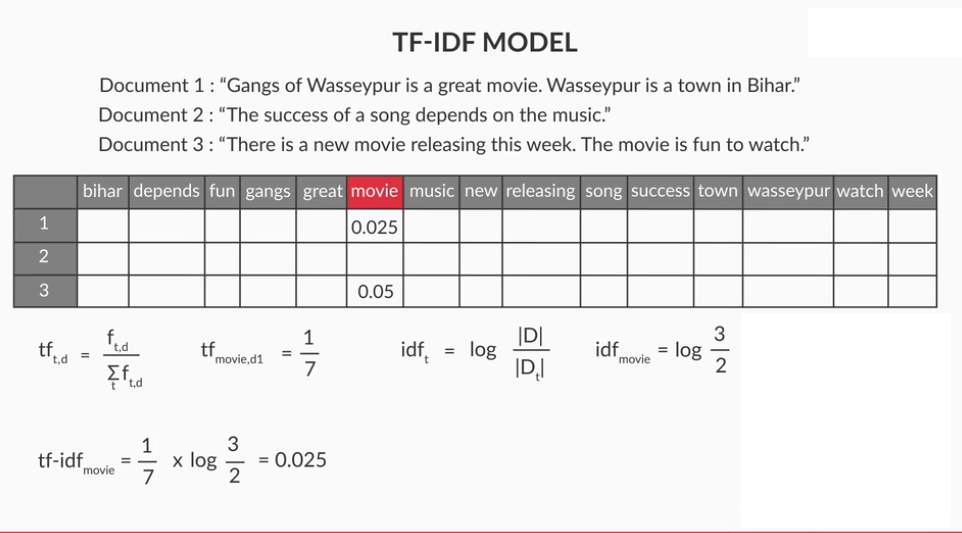


The TF-IDF representation, also called the TF-IDF model, takes into the account the importance of each word. In the bag-of-words model, each word is assumed to be equally important, which is of course not correct.

 

The formula to calculate TF-IDF weight of a term in a document is:

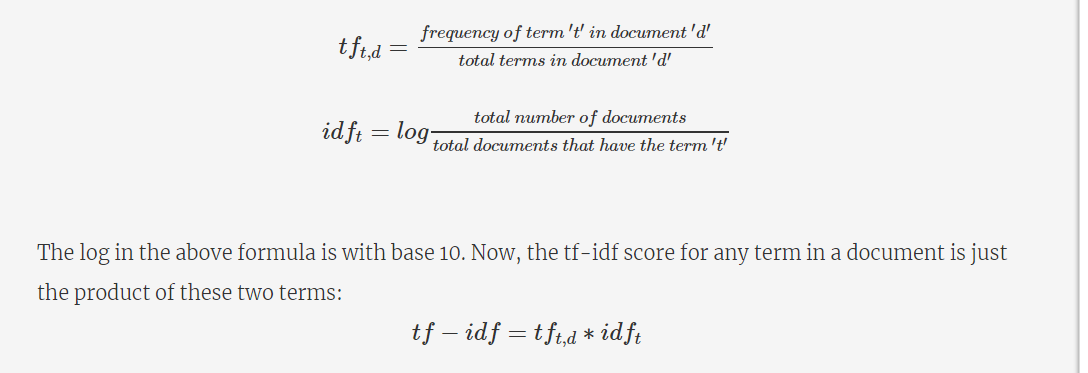

Higher weights are assigned to terms that are present frequently in a document and which are rare among all documents. On the other hand, a low score is assigned to terms which are common across all documents.

 

Now, attempt the following quiz. Questions 1-3 are based on the following set of documents:
Document1: "Vapour, Bangalore has a really great terrace seating and an awesome view of the Bangalore skyline"
Document2: "The beer at Vapour, Bangalore was amazing. My favourites are the wheat beer and the ale beer."
Document3: "Vapour, Bangalore has the best view in Bangalore."

What is the tf-idf score of the term ‘Bangalore’ in document one? (Remove stop words and punctuations before calculating the tf-idf score).

Solution : TF('Bangalore', document1) is 0.2 since there are a total of 10 terms and Bangalore occurs two times. The idf('Bangalore') is log10(3/3) which equals zero. Tf-idf is tf*idf which will be equal to zero.


Note that tf-idf is implemented in different ways in different languages and packages. In the tf score representation, some people use only the frequency of the term, i.e. they don’t divide the frequency of the term with the total number of terms. In the idf score representation, some people use natural log instead of the log with base 10. Due to this, you may see a different score of the same terms in the same set of documents. But the goal remains the same - assign a weight according to the word's importance. 

 

## TF-IDF model


In [111]:
# load all necessary libraries
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

pd.set_option('max_colwidth', 100)


### Let's build a basic bag of words model on three sample documents

In [112]:
documents = ["Gangs of Wasseypur is a great movie. Wasseypur is a town in Bihar.", "The success of a song depends on the music.", "There is a new movie releasing this week. The movie is fun to watch."]
print(documents)

['Gangs of Wasseypur is a great movie. Wasseypur is a town in Bihar.', 'The success of a song depends on the music.', 'There is a new movie releasing this week. The movie is fun to watch.']


In [113]:
documents = ["Vapour, Bangalore has a really great terrace seating and an awesome view of the Bangalore skyline",
             "The beer at Vapour, Bangalore was amazing. My favorites are the wheat beer and the ale beer.",
             "Vapour, Bangalore has the best view in Bangalore."]
print(documents)

['Vapour, Bangalore has a really great terrace seating and an awesome view of the Bangalore skyline', 'The beer at Vapour, Bangalore was amazing. My favorites are the wheat beer and the ale beer.', 'Vapour, Bangalore has the best view in Bangalore.']


In [114]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

# add stemming and lemmatisation in the preprocess function
def preprocess(document):
    'changes document to lower case and removes stopwords'

    # change sentence to lower case
    document = document.lower()

    # tokenize into words
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stopwords.words("english")]
    
    # stem
    #words = [stemmer.stem(word) for word in words]
    
    # join words to make sentence
    document = " ".join(words)
    
    return document

In [115]:
documents = [preprocess(document) for document in documents]
print(documents)

['vapour , bangalore really great terrace seating awesome view bangalore skyline', 'beer vapour , bangalore amazing . favorites wheat beer ale beer .', 'vapour , bangalore best view bangalore .']


##### Creating bag of words model using count vectorizer function

In [116]:
vectorizer = TfidfVectorizer()
tfidf_model = vectorizer.fit_transform(documents)
print(tfidf_model)  # returns the row number and column number of cells which have 1 as value

  (0, 12)	0.20472809091871683
  (0, 3)	0.40945618183743365
  (0, 8)	0.34663478992044555
  (0, 7)	0.34663478992044555
  (0, 11)	0.34663478992044555
  (0, 9)	0.34663478992044555
  (0, 2)	0.34663478992044555
  (0, 13)	0.2636246924033099
  (0, 10)	0.34663478992044555
  (1, 12)	0.15958136664279546
  (1, 3)	0.15958136664279546
  (1, 4)	0.8105842230034561
  (1, 1)	0.27019474100115204
  (1, 6)	0.27019474100115204
  (1, 14)	0.27019474100115204
  (1, 0)	0.27019474100115204
  (2, 12)	0.32401895323148033
  (2, 3)	0.6480379064629607
  (2, 13)	0.41723339721076924
  (2, 5)	0.5486117771118657


In [117]:
# print the full sparse matrix
print(tfidf_model.toarray())

[[0.         0.         0.34663479 0.40945618 0.         0.
  0.         0.34663479 0.34663479 0.34663479 0.34663479 0.34663479
  0.20472809 0.26362469 0.        ]
 [0.27019474 0.27019474 0.         0.15958137 0.81058422 0.
  0.27019474 0.         0.         0.         0.         0.
  0.15958137 0.         0.27019474]
 [0.         0.         0.         0.64803791 0.         0.54861178
  0.         0.         0.         0.         0.         0.
  0.32401895 0.4172334  0.        ]]


In [118]:
pd.DataFrame(tfidf_model.toarray(), columns = vectorizer.get_feature_names())

,ale,amazing,awesome,bangalore,beer,best,favorites,great,really,seating,skyline,terrace,vapour,view,wheat
0,0.000000,0.000000,0.346635,0.409456,0.000000,0.000000,0.000000,0.346635,0.346635,0.346635,0.346635,0.346635,0.204728,0.263625,0.000000
1,0.270195,0.270195,0.000000,0.159581,0.810584,0.000000,0.270195,0.000000,0.000000,0.000000,0.000000,0.000000,0.159581,0.000000,0.270195
2,0.000000,0.000000,0.000000,0.648038,0.000000,0.548612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.324019,0.417233,0.000000


### Let's create a tf-idf model on the spam dataset.

In [120]:
# load data
spam = pd.read_csv("SMSSpamCollection_tfidf.txt", sep = "\t", names=["label", "message"])
spam.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


#### Let's take a subset of data (first 50 rows only) and create bag of word model on that.

In [121]:
spam = spam.iloc[0:50,:]
print(spam)

   label  \
0    ham   
1    ham   
2   spam   
3    ham   
4    ham   
5   spam   
6    ham   
7    ham   
8   spam   
9   spam   
10   ham   
11  spam   
12  spam   
13   ham   
14   ham   
15  spam   
16   ham   
17   ham   
18   ham   
19  spam   
20   ham   
21   ham   
22   ham   
23   ham   
24   ham   
25   ham   
26   ham   
27   ham   
28   ham   
29   ham   
30   ham   
31   ham   
32   ham   
33   ham   
34  spam   
35   ham   
36   ham   
37   ham   
38   ham   
39   ham   
40   ham   
41   ham   
42  spam   
43   ham   
44   ham   
45   ham   
46   ham   
47   ham   
48   ham   
49   ham   

                                                                                                message  
0   Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...  
1                                                                         Ok lar... Joking wif u oni...  
2   Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 200

In [122]:
# extract the messages from the dataframe
messages = [message for message in spam.message]
print(messages)

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think he goes to usf, he lives around here though", "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv", 'Even my brother is not like to speak with me. They treat me like aids patent.', "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune", 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.', 'Had your mobile 

In [123]:
# preprocess messages using the preprocess function
messages = [preprocess(message) for message in messages]
print(messages)

['go jurong point , crazy.. available bugis n great world la e buffet ... cine got amore wat ...', 'ok lar ... joking wif u oni ...', "free entry 2 wkly comp win fa cup final tkts 21st may 2005. text fa 87121 receive entry question ( std txt rate ) & c 's apply 08452810075over18 's", 'u dun say early hor ... u c already say ...', "nah n't think goes usf , lives around though", "freemsg hey darling 's 3 week 's word back ! 'd like fun still ? tb ok ! xxx std chgs send , £1.50 rcv", 'even brother like speak . treat like aids patent .', "per request 'melle melle ( oru minnaminunginte nurungu vettam ) ' set callertune callers . press *9 copy friends callertune", 'winner ! ! valued network customer selected receivea £900 prize reward ! claim call 09061701461. claim code kl341 . valid 12 hours .', 'mobile 11 months ? u r entitled update latest colour mobiles camera free ! call mobile update co free 08002986030', "'m gon na home soon n't want talk stuff anymore tonight , k ? 've cried enough 

In [124]:
# bag of words model
vectorizer = TfidfVectorizer()
tfidf_model = vectorizer.fit_transform(messages)

In [125]:
# Let's look at the dataframe
tfidf = pd.DataFrame(tfidf_model.toarray(), columns = vectorizer.get_feature_names())
tfidf

,000,07732584351,08000930705,08002986030,08452810075over18,09061701461,100,11,12,150p,...,worried,www,xuhui,xxx,xxxmobilemovieclub,yeah,yes,yummy,yup,ú1
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.198284,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.256871,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.230701,0.000000,0.000000,0.230701,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.230794,0.000000,0.000000,0.000000,0.230794,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [126]:
# token names
print(vectorizer.get_feature_names())

['000', '07732584351', '08000930705', '08002986030', '08452810075over18', '09061701461', '100', '11', '12', '150p', '16', '20', '2005', '21st', '2nd', '4403ldnw1a7rw18', '4txt', '50', '6days', '81010', '87077', '87121', '87575', '8am', '900', 'abiola', 'actin', 'aft', 'ahead', 'ahhh', 'aids', 'already', 'alright', 'always', 'amore', 'amp', 'anymore', 'anything', 'apologetic', 'apply', 'arabian', 'ard', 'around', 'ask', 'available', 'back', 'badly', 'bit', 'blessing', 'breather', 'brother', 'buffet', 'bugis', 'burns', 'bus', 'ca', 'call', 'callers', 'callertune', 'calls', 'camcorder', 'camera', 'car', 'cash', 'catch', 'caught', 'chances', 'charged', 'cheers', 'chgs', 'child', 'cine', 'claim', 'clear', 'click', 'co', 'code', 'colour', 'com', 'comin', 'comp', 'confirm', 'convincing', 'copy', 'cost', 'could', 'crave', 'crazy', 'credit', 'cried', 'csh11', 'cup', 'cuppa', 'customer', 'da', 'darling', 'date', 'day', 'dbuk', 'decide', 'decided', 'delivery', 'dinner', 'done', 'dont', 'dun', 'ea

#### You are given a set of documents in the code below. Calculate the tf-idf matrix and output the score of the term 'belt' in document two.

In [127]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# consider the following set of documents
documents = ["The coach lumbered on again, with heavier wreaths of mist closing round it as it began the descent.",
             "The guard soon replaced his blunderbuss in his arm-chest, and, having looked to the rest of its contents, and having looked to the supplementary pistols that he wore in his belt, looked to a smaller chest beneath his seat, in which there were a few smith's tools, a couple of torches, and a tinder-box.",
            "For he was furnished with that completeness that if the coach-lamps had been blown and stormed out, which did occasionally happen, he had only to shut himself up inside, keep the flint and steel sparks well off the straw, and get a light with tolerable safety and ease (if he were lucky) in five minutes.",
            "Jerry, left alone in the mist and darkness, dismounted meanwhile, not only to ease his spent horse, but to wipe the mud from his face, and shake the wet out of his hat-brim, which might be capable of holding about half a gallon.",
            "After standing with the bridle over his heavily-splashed arm, until the wheels of the mail were no longer within hearing and the night was quite still again, he turned to walk down the hill."]


# preprocess document
def preprocess(document):
    'changes document to lower case, removes stopwords and stems words'

    # change sentence to lower case
    document = document.lower()

    # tokenize into words
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stopwords.words("english")]
    
    # stem
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    # join words to make sentence
    document = " ".join(words)
    
    return document

# preprocess documents using the preprocess function and store the documents again in a list
documents = [preprocess(document) for document in documents] # write code here

# create tf-idf matrix
## write code here ##
vectorizer = TfidfVectorizer()
tfidf_model = vectorizer.fit_transform(documents)
# extract score
score = -1  # replace -1 with the score of 'belt' in document two. You can manually write the value by looking at the tf_idf model

# print the score -- don't change the following piece od code, it's used to evaluate your code
print(round(score, 4))

-1


In [128]:
vales = "Vapour, Bangalore has a really great terrace seating and an awesome view of the Bangalore skyline"
documents = [preprocess(document) for document in vales]

In [131]:
preprocess("The beer at Vapour, Bangalore was amazing. My favourites are the wheat beer and the ale beer")

'beer vapour , bangalor amaz . favourit wheat beer ale beer'


Document1: "Vapour, Bangalore has a really great terrace seating and an awesome view of the Bangalore skyline"
Document2: "The beer at Vapour, Bangalore was amazing. My favourites are the wheat beer and the ale beer."
Document3: "Vapour, Bangalore has the best view in Bangalore."


What’s the tf-idf score of the term ‘beer’ in document two?  (Remove stop words and punctuations before calculating the tf-idf score). Round your answer to three digits after the decimal.



TF('beer', document1) is 1/3 since there are a total of 9 terms and ‘beer’ occurs three times. The idf('beer') is log10(3/1) since there are three documents and ‘beer’ occurs in the second document only. Hence, the total score is tf*idf which is (⅓)*log10(3) which equals 0.159. After rounding to two nearest decimal places, the answer that we get is 0.159



The tf of ‘vapour’ and ‘bangalore’ in the second document is equal. The idf of both of these terms is also equal since they have an idf score of zero. Hence, their tf-idf score is also equal.

Note that tf-idf is implemented in different ways in different languages and packages. In the tf score representation, some people use only the frequency of the term, i.e. they don’t divide the frequency of the term with the total number of terms. In the idf score representation, some people use natural log instead of the log with base 10. Due to this, you may see a different score of the same terms in the same set of documents. But the goal remains the same - assign a weight according to the word's importance. 